In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv('CO2 Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
data.shape

(7385, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
data.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
data = data.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis=1)
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [9]:
data_norm = (data - data.mean()) / data.std()
data_norm

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,-0.856663,-0.883348,-0.758950,-1.052709,-0.855684,0.763059,-0.932870
1,-0.561279,-0.883348,-0.387551,-0.603161,-0.475391,0.209952,-0.505612
2,-1.225893,-0.883348,-1.873149,-1.457303,-1.754558,2.837208,-1.958288
3,0.251026,0.210561,0.040987,0.026206,0.043191,-0.343155,0.075459
4,0.251026,0.210561,-0.130428,-0.153613,-0.129670,-0.066601,-0.112535
...,...,...,...,...,...,...,...
7380,-0.856663,-0.883348,-0.530397,-0.603161,-0.544535,0.348229,-0.539792
7381,-0.856663,-0.883348,-0.387551,-0.333433,-0.371675,0.209952,-0.317618
7382,-0.856663,-0.883348,-0.244705,-0.198568,-0.233386,-0.066601,-0.180896
7383,-0.856663,-0.883348,-0.387551,-0.333433,-0.371675,0.209952,-0.317618


In [10]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [11]:
kmeans.fit(data_norm)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
import pandas as pd
import random
import datetime

# Load the data
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Create a list of random dates
start_date = datetime.date(2000, 1, 1)
end_date = datetime.date(2021, 12, 31)
date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]
random_dates = [random.choice(date_list) for _ in range(len(data))]

# Add the random date column to the data
data['Random Date'] = random_dates

# Save the modified data to a new CSV file
data.to_csv('CO2_Emissions_Canada_Random.csv', index=False)

In [27]:

X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].values
y = data['CO2 Emissions(g/km)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a k-NN regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# Train the regressor using the training data
knn.fit(X_train, y_train)

# Use the regressor to predict the CO2 emissions for the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Coefficient of determination (R^2): %.2f" % r2)


Mean squared error: 100.59
Coefficient of determination (R^2): 0.97


In [23]:
data_norm['Date'] = np.random.rand(len(data))
data_norm.to_csv('CO2_Emissions_Canada_Random.csv', index=False)

X = data_norm[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].values
y = data_norm['CO2 Emissions(g/km)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Coefficient of determination (R^2): %.2f" % r2)

Mean squared error: 0.02
Coefficient of determination (R^2): 0.98


In [22]:
data_norm

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Random Data
0,-0.856663,-0.883348,-0.758950,-1.052709,-0.855684,0.763059,-0.932870,0.568965
1,-0.561279,-0.883348,-0.387551,-0.603161,-0.475391,0.209952,-0.505612,0.897757
2,-1.225893,-0.883348,-1.873149,-1.457303,-1.754558,2.837208,-1.958288,0.763509
3,0.251026,0.210561,0.040987,0.026206,0.043191,-0.343155,0.075459,0.947546
4,0.251026,0.210561,-0.130428,-0.153613,-0.129670,-0.066601,-0.112535,0.972003
...,...,...,...,...,...,...,...,...
7380,-0.856663,-0.883348,-0.530397,-0.603161,-0.544535,0.348229,-0.539792,0.526276
7381,-0.856663,-0.883348,-0.387551,-0.333433,-0.371675,0.209952,-0.317618,0.727710
7382,-0.856663,-0.883348,-0.244705,-0.198568,-0.233386,-0.066601,-0.180896,0.676403
7383,-0.856663,-0.883348,-0.387551,-0.333433,-0.371675,0.209952,-0.317618,0.099103


In [77]:
data['Cluster'] = kmeans.labels_

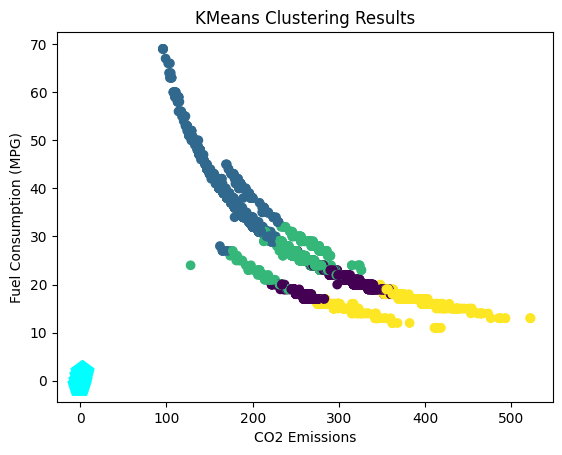

In [78]:
plt.scatter(data['CO2 Emissions(g/km)'], data['Fuel Consumption Comb (mpg)'], c=data['Cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='p', s=300, c='cyan')
plt.xlabel('CO2 Emissions')
plt.ylabel('Fuel Consumption (MPG)')
plt.title('KMeans Clustering Results')
plt.show()

In [79]:
# Define a simple exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [80]:
# Perform curve fitting on the CO2 emissions data
popt, pcov = curve_fit(exp_growth, data.index, data['CO2 Emissions(g/km)'])
popt, pcov 

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py:970: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, m

(array([1., 1.]),
 array([[nan, nan],
        [nan, nan]]))

In [81]:
def err_ranges(x, func, param, sigma):

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p, s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 

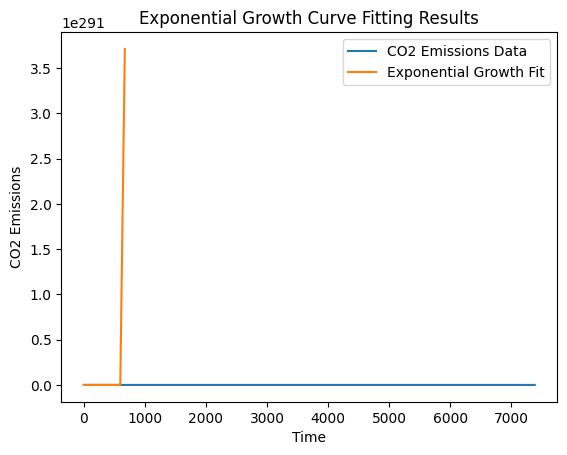

In [86]:
plt.plot(data['CO2 Emissions(g/km)'], label='CO2 Emissions Data')
plt.plot(x, y_fit, label='Exponential Growth Fit')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.title('Exponential Growth Curve Fitting Results')
plt.legend()
plt.show()